In [1]:
from pycaret.datasets import get_data

#here is the list of all available datasets
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [2]:
dataset=get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [5]:
categoricals = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [6]:
dataset.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
department                10
salary                     3
left                       2
dtype: int64

In [7]:
# for the sake of time, let's work wity a tiny subsample of data
dataset = dataset.sample(5000)

In [8]:
data=dataset.sample(frac=0.9,random_state=123)
data_unseen=dataset.drop(data.index)

data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True,inplace=True)
print('Data for Modeling: '+str(data.shape))
print('Unseen Data Prediction: '+str(data_unseen.shape))

Data for Modeling: (4500, 10)
Unseen Data Prediction: (500, 10)


In [9]:
data.shape

(4500, 10)

In [10]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.39,0.55,2,156,3,0,0,sales,high,1
1,0.54,0.64,2,128,2,0,0,sales,low,0
2,0.61,0.55,3,245,3,0,0,sales,medium,0
3,0.37,0.46,2,149,3,0,0,marketing,high,1
4,0.89,0.93,5,191,4,0,0,sales,low,0


Setting up Environment in PyCaret

setup():

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

In [11]:
from pycaret.classification import *

In [12]:
exp=ClassificationExperiment()
exp.setup(data, target='left',session_id=555,categorical_features=categoricals,train_size=0.8,preprocess=True)

,Description,Value
0,Session id,555
1,Target,left
2,Target type,Binary
3,Original data shape,"(4500, 10)"
4,Transformed data shape,"(4500, 21)"
5,Transformed train set shape,"(3600, 21)"
6,Transformed test set shape,"(900, 21)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,4


In [13]:
# list of available models in PyCaret for classification.
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Compare Models

This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [14]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9817,0.9847,0.9391,0.9827,0.9603,0.9484,0.9489,0.4470
xgboost,Extreme Gradient Boosting,0.9800,0.9827,0.9379,0.9768,0.9567,0.9437,0.9442,0.8130
rf,Random Forest Classifier,0.9797,0.9853,0.9239,0.9899,0.9555,0.9424,0.9435,0.6990
catboost,CatBoost Classifier,0.9778,0.9859,0.9297,0.9754,0.9519,0.9374,0.9380,3.6010
gbc,Gradient Boosting Classifier,0.9739,0.9835,0.9250,0.9635,0.9438,0.9268,0.9272,0.6420
et,Extra Trees Classifier,0.9689,0.9818,0.9004,0.9661,0.9318,0.9117,0.9129,0.7210
dt,Decision Tree Classifier,0.9633,0.9550,0.9391,0.9095,0.9239,0.8998,0.9001,0.3340
ada,Ada Boost Classifier,0.9572,0.9782,0.8992,0.9187,0.9086,0.8807,0.8810,0.5530
knn,K Neighbors Classifier,0.9325,0.9607,0.9050,0.8274,0.8643,0.8195,0.8211,0.5720
qda,Quadratic Discriminant Analysis,0.8142,0.9054,0.8406,0.5797,0.6827,0.5586,0.5811,0.3840


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=555, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
# Adding the list of models we want to include in our study: 
model_list = ['lr','dt','rf','xgboost','catboost','lightgbm']

In [16]:
my_models = exp.compare_models(include=model_list, n_select=6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9817,0.9847,0.9391,0.9827,0.9603,0.9484,0.9489,0.4400
xgboost,Extreme Gradient Boosting,0.9800,0.9827,0.9379,0.9768,0.9567,0.9437,0.9442,0.7660
rf,Random Forest Classifier,0.9797,0.9853,0.9239,0.9899,0.9555,0.9424,0.9435,0.7420
catboost,CatBoost Classifier,0.9778,0.9859,0.9297,0.9754,0.9519,0.9374,0.9380,4.3890
dt,Decision Tree Classifier,0.9633,0.9550,0.9391,0.9095,0.9239,0.8998,0.9001,0.3350
lr,Logistic Regression,0.7842,0.8247,0.3247,0.5797,0.4152,0.2960,0.3150,0.5300


Tune model

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [17]:
# data is relatively balanced, we can optimize based on accuracy. 
data['left'].value_counts()

0    3434
1    1066
Name: left, dtype: int64

In [18]:
my_models

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=555, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, ma

In [19]:
tuned_models=[exp.tune_model(model,optimize='Accuracy') for model in my_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9972,1.0000,0.9882,1.0000,0.9941,0.9923,0.9923
1,0.9750,0.9792,0.9059,0.9872,0.9448,0.9287,0.9301
2,0.9778,0.9643,0.9294,0.9753,0.9518,0.9374,0.9378
3,0.9889,0.9905,0.9647,0.9880,0.9762,0.9689,0.9691
4,0.9694,0.9688,0.8941,0.9744,0.9325,0.9128,0.9142
5,0.9861,0.9798,0.9529,0.9878,0.9701,0.9610,0.9613
6,0.9889,0.9923,0.9647,0.9880,0.9762,0.9689,0.9691
7,0.9694,0.9775,0.8953,0.9747,0.9333,0.9136,0.9149
8,0.9806,0.9956,0.9186,1.0000,0.9576,0.9450,0.9464


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9861,0.9994,0.9765,0.9651,0.9708,0.9617,0.9617
1,0.9611,0.9764,0.9176,0.9176,0.9176,0.8922,0.8922
2,0.9722,0.9719,0.9412,0.9412,0.9412,0.9230,0.9230
3,0.9861,0.9898,0.9765,0.9651,0.9708,0.9617,0.9617
4,0.9611,0.9692,0.9059,0.9277,0.9167,0.8913,0.8914
5,0.9694,0.9835,0.9529,0.9205,0.9364,0.9163,0.9166
6,0.9806,0.9863,0.9647,0.9535,0.9591,0.9463,0.9463
7,0.9639,0.9829,0.9070,0.9398,0.9231,0.8995,0.8997
8,0.9833,0.9944,0.9419,0.9878,0.9643,0.9534,0.9539


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9861,0.9964,0.9412,1.0000,0.9697,0.9607,0.9614
1,0.9667,0.9716,0.8941,0.9620,0.9268,0.9053,0.9063
2,0.9611,0.9708,0.8941,0.9383,0.9157,0.8904,0.8908
3,0.9806,0.9956,0.9294,0.9875,0.9576,0.9450,0.9457
4,0.9472,0.9741,0.8588,0.9125,0.8848,0.8507,0.8513
5,0.9583,0.9753,0.9059,0.9167,0.9112,0.8840,0.8840
6,0.9806,0.9826,0.9412,0.9756,0.9581,0.9454,0.9457
7,0.9639,0.9882,0.8837,0.9620,0.9212,0.8978,0.8992
8,0.9722,0.9895,0.8953,0.9872,0.9390,0.9211,0.9229


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9944,0.9999,0.9765,1.0000,0.9881,0.9845,0.9846
1,0.9722,0.9837,0.9059,0.9747,0.9390,0.9211,0.9221
2,0.9778,0.9678,0.9294,0.9753,0.9518,0.9374,0.9378
3,0.9889,0.9907,0.9647,0.9880,0.9762,0.9689,0.9691
4,0.9694,0.9688,0.8941,0.9744,0.9325,0.9128,0.9142
5,0.9861,0.9761,0.9529,0.9878,0.9701,0.9610,0.9613
6,0.9889,0.9864,0.9647,0.9880,0.9762,0.9689,0.9691
7,0.9722,0.9771,0.9186,0.9634,0.9405,0.9224,0.9228
8,0.9806,0.9868,0.9302,0.9877,0.9581,0.9454,0.9462


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9806,0.9949,0.9412,0.9756,0.9581,0.9454,0.9457
1,0.9694,0.9504,0.8941,0.9744,0.9325,0.9128,0.9142
2,0.9722,0.9614,0.9059,0.9747,0.9390,0.9211,0.9221
3,0.9722,0.9792,0.9059,0.9747,0.9390,0.9211,0.9221
4,0.9556,0.9439,0.8588,0.9481,0.9012,0.8727,0.8744
5,0.9667,0.9744,0.9059,0.9506,0.9277,0.9061,0.9065
6,0.9778,0.9733,0.9412,0.9639,0.9524,0.9379,0.9380
7,0.9694,0.9637,0.8837,0.9870,0.9325,0.9128,0.9152
8,0.9667,0.9748,0.9070,0.9512,0.9286,0.9068,0.9073


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8355,0.2941,0.5556,0.3846,0.2644,0.2843
1,0.8056,0.8310,0.4118,0.6364,0.5000,0.3861,0.4002
2,0.8000,0.8134,0.3176,0.6585,0.4286,0.3248,0.3566
3,0.7722,0.8603,0.2941,0.5319,0.3788,0.2532,0.2699
4,0.7944,0.8304,0.3529,0.6122,0.4478,0.3325,0.3515
5,0.7972,0.8051,0.3647,0.6200,0.4593,0.3446,0.3630
6,0.7917,0.8090,0.3412,0.6042,0.4361,0.3202,0.3399
7,0.7833,0.8302,0.3488,0.5769,0.4348,0.3107,0.3257
8,0.7778,0.7991,0.4070,0.5469,0.4667,0.3301,0.3359


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [20]:
#[x for x in range(5)]

[0, 1, 2, 3, 4]

In [21]:
tuned_models

[LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
                importance_type='split', learning_rate=0.5, max_depth=-1,
                min_child_samples=1, min_child_weight=0.001, min_split_gain=0,
                n_estimators=90, n_jobs=-1, num_leaves=256, objective=None,
                random_state=555, reg_alpha=0.4, reg_lambda=4, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_thresho

Create Model

This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [22]:
# From the above exercise, it seems that the first 3 tuned models (rf, dt and catboost) are the best. Let's create them separately for further visualizations and reports.
rf = exp.create_model('rf')
tuned_rf = exp.tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9889,0.9994,0.9529,1.0000,0.9759,0.9687,0.9692
1,0.9778,0.9746,0.9059,1.0000,0.9506,0.9363,0.9382
2,0.9750,0.9730,0.9176,0.9750,0.9455,0.9293,0.9300
3,0.9889,0.9935,0.9647,0.9880,0.9762,0.9689,0.9691
4,0.9667,0.9760,0.8824,0.9740,0.9259,0.9045,0.9063
5,0.9861,0.9831,0.9529,0.9878,0.9701,0.9610,0.9613
6,0.9833,0.9900,0.9412,0.9877,0.9639,0.9530,0.9535
7,0.9667,0.9828,0.8721,0.9868,0.9259,0.9045,0.9074
8,0.9806,0.9957,0.9186,1.0000,0.9576,0.9450,0.9464


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9861,0.9964,0.9412,1.0000,0.9697,0.9607,0.9614
1,0.9667,0.9716,0.8941,0.9620,0.9268,0.9053,0.9063
2,0.9611,0.9708,0.8941,0.9383,0.9157,0.8904,0.8908
3,0.9806,0.9956,0.9294,0.9875,0.9576,0.9450,0.9457
4,0.9472,0.9741,0.8588,0.9125,0.8848,0.8507,0.8513
5,0.9583,0.9753,0.9059,0.9167,0.9112,0.8840,0.8840
6,0.9806,0.9826,0.9412,0.9756,0.9581,0.9454,0.9457
7,0.9639,0.9882,0.8837,0.9620,0.9212,0.8978,0.8992
8,0.9722,0.9895,0.8953,0.9872,0.9390,0.9211,0.9229


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
dt = exp.create_model('dt')
tuned_dt = exp.tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9722,0.9696,0.9647,0.9213,0.9425,0.9242,0.9247
1,0.9556,0.9465,0.9294,0.8876,0.9080,0.8788,0.8792
2,0.9500,0.9429,0.9294,0.8681,0.8977,0.8647,0.8656
3,0.9806,0.9791,0.9765,0.9432,0.9595,0.9467,0.9470
4,0.9556,0.9425,0.9176,0.8966,0.9070,0.8778,0.8779
5,0.9667,0.9538,0.9294,0.9294,0.9294,0.9076,0.9076
6,0.9694,0.9678,0.9647,0.9111,0.9371,0.9170,0.9176
7,0.9583,0.9407,0.9070,0.9176,0.9123,0.8850,0.8850
8,0.9583,0.9527,0.9419,0.8901,0.9153,0.8877,0.8883


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9806,0.9949,0.9412,0.9756,0.9581,0.9454,0.9457
1,0.9694,0.9504,0.8941,0.9744,0.9325,0.9128,0.9142
2,0.9722,0.9614,0.9059,0.9747,0.9390,0.9211,0.9221
3,0.9722,0.9792,0.9059,0.9747,0.9390,0.9211,0.9221
4,0.9556,0.9439,0.8588,0.9481,0.9012,0.8727,0.8744
5,0.9667,0.9744,0.9059,0.9506,0.9277,0.9061,0.9065
6,0.9778,0.9733,0.9412,0.9639,0.9524,0.9379,0.9380
7,0.9694,0.9637,0.8837,0.9870,0.9325,0.9128,0.9152
8,0.9667,0.9748,0.9070,0.9512,0.9286,0.9068,0.9073


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [24]:
catboost = exp.create_model('catboost')
tuned_catboost = exp.tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9917,0.9989,0.9765,0.9881,0.9822,0.9768,0.9768
1,0.9694,0.9788,0.8941,0.9744,0.9325,0.9128,0.9142
2,0.9694,0.9747,0.9176,0.9512,0.9341,0.9142,0.9145
3,0.9889,0.9953,0.9529,1.0000,0.9759,0.9687,0.9692
4,0.9611,0.9767,0.8941,0.9383,0.9157,0.8904,0.8908
5,0.9806,0.9814,0.9412,0.9756,0.9581,0.9454,0.9457
6,0.9806,0.9922,0.9412,0.9756,0.9581,0.9454,0.9457
7,0.9750,0.9828,0.9186,0.9753,0.9461,0.9299,0.9306
8,0.9778,0.9916,0.9186,0.9875,0.9518,0.9374,0.9384


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9944,0.9999,0.9765,1.0000,0.9881,0.9845,0.9846
1,0.9722,0.9837,0.9059,0.9747,0.9390,0.9211,0.9221
2,0.9778,0.9678,0.9294,0.9753,0.9518,0.9374,0.9378
3,0.9889,0.9907,0.9647,0.9880,0.9762,0.9689,0.9691
4,0.9694,0.9688,0.8941,0.9744,0.9325,0.9128,0.9142
5,0.9861,0.9761,0.9529,0.9878,0.9701,0.9610,0.9613
6,0.9889,0.9864,0.9647,0.9880,0.9762,0.9689,0.9691
7,0.9722,0.9771,0.9186,0.9634,0.9405,0.9224,0.9228
8,0.9806,0.9868,0.9302,0.9877,0.9581,0.9454,0.9462


Fitting 10 folds for each of 10 candidates, totalling 100 fits


The winner is tuned_catboost model for this classificaiton problem. 

Plot Model

This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases

In [25]:
exp.plot_model(tuned_catboost, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,130
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


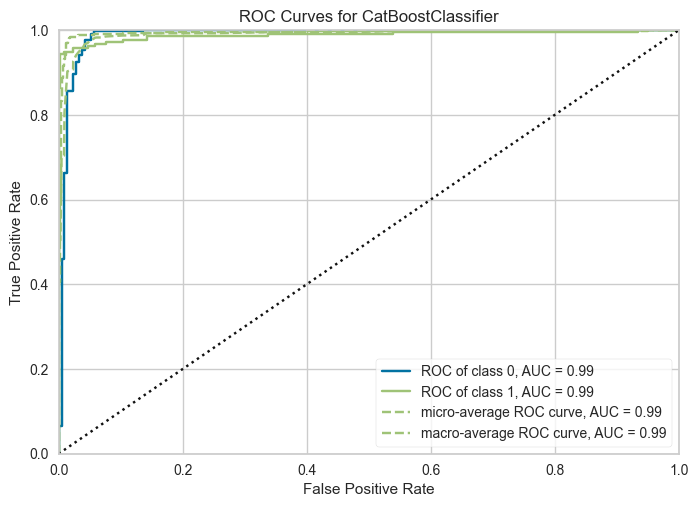

In [26]:
exp.plot_model(tuned_catboost, plot = 'auc')

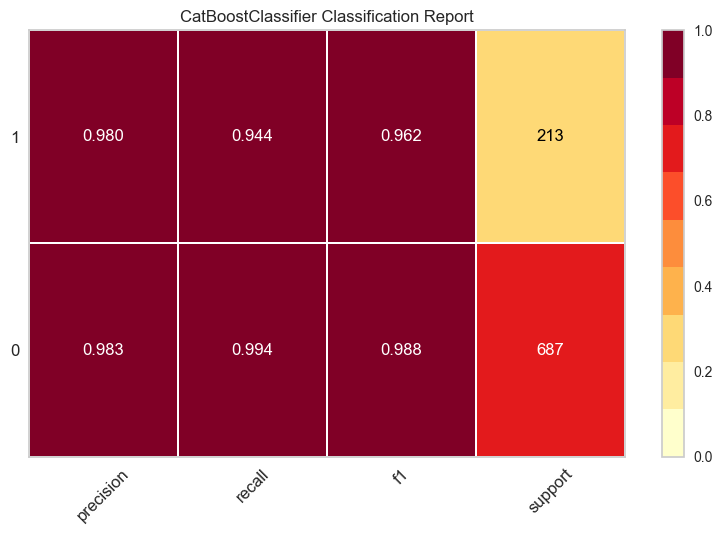

In [27]:
exp.plot_model(tuned_catboost, plot = 'class_report')

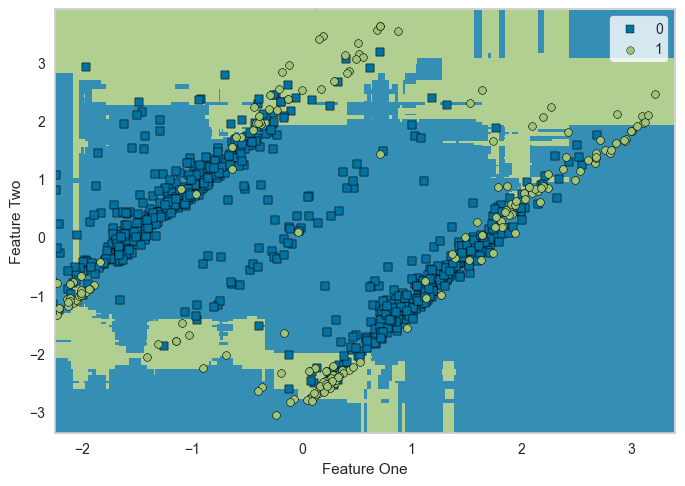

In [28]:
exp.plot_model(tuned_catboost, plot = 'boundary')

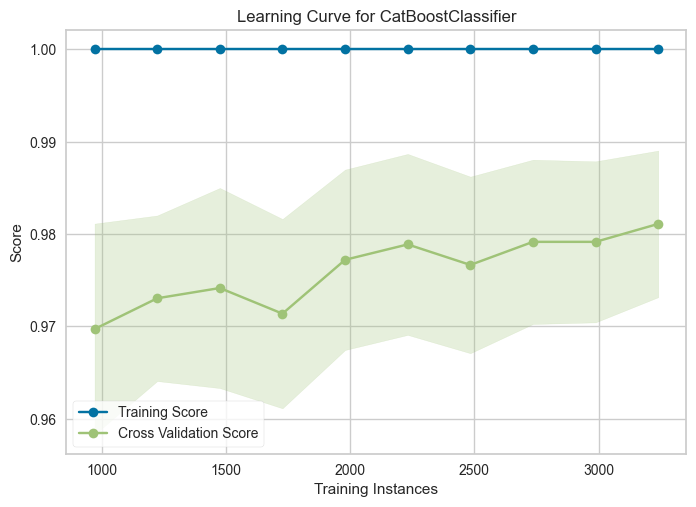

In [29]:
exp.plot_model(tuned_catboost, plot = 'learning')

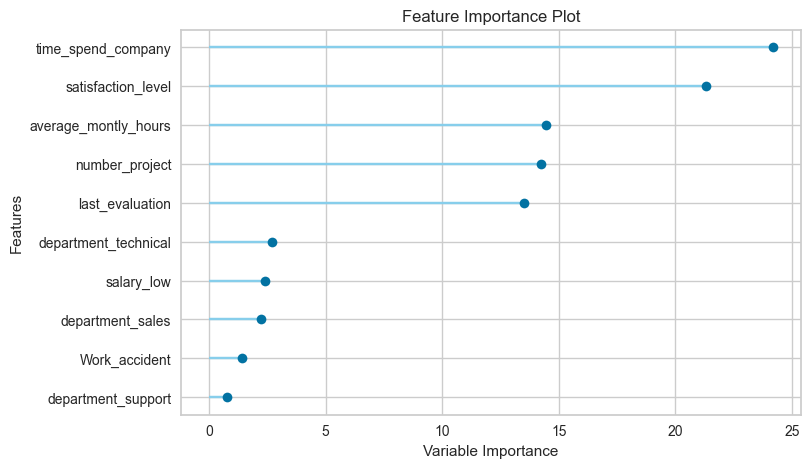

In [30]:
exp.plot_model(tuned_catboost, plot = 'feature')

Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set. In PyCaret terminology, holdout is equivalent to our validation set.

note: so far, our best model is the tuned_catboost model with the highest CV accuracy. :)

In [31]:
holdout_pred = exp.predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9822,0.9884,0.9437,0.9805,0.9617,0.9502,0.9504


In [32]:
holdout_pred

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,prediction_label,prediction_score
3600,0.68,0.83,3,133,3,0,0,hr,low,0,0,0.9990
3601,0.72,0.64,4,140,2,0,0,sales,low,0,0,0.9764
3602,0.22,0.85,6,172,6,1,0,technical,medium,0,0,0.9993
3603,0.24,0.42,5,210,5,0,0,accounting,low,0,0,0.9974
3604,0.96,0.97,4,260,3,0,0,support,low,0,0,0.9990
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.94,0.71,4,189,3,0,0,support,medium,0,0,0.9998
4496,0.97,0.90,5,262,3,0,0,sales,medium,0,0,0.9997
4497,0.89,0.79,3,149,2,0,0,support,medium,1,0,0.9999
4498,0.62,0.40,3,158,8,1,0,marketing,low,0,0,0.9995


## Finalize Model

This function trains a given estimator on the * 5000 total observations
* 4500 used for modeling: 
   - 900 is holdout set
   - 3600 is train set
* 500 unseen dataentire dataset including the holdout set.

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.


    5000 total observations
    4500 used for modeling:
        900 is holdout set
        3600 is train set
    500 unseen data



In [ ]:
final_model = exp.finalize_model(tuned_catboost)

In [ ]:
final_model

### Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% of the original dataset which was never exposed to PyCaret.

In [ ]:
unseen_predictions = exp.predict_model(final_model, data=data_unseen)
unseen_predictions

Save Model

This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [36]:
exp.save_model(final_model, 'my_pycaret_classifier')

NameError: name 'final_model' is not defined

Load model

This function loads a previously saved pipeline.

In [37]:
my_winning_classifier = load_model('my_pycaret_classifier')

FileNotFoundError: [Errno 2] No such file or directory: 'my_pycaret_classifier.pkl'

In [38]:
my_winning_classifier

NameError: name 'my_winning_classifier' is not defined

Additional Links: 

1. https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb
2. https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb
3. https://pycaret.gitbook.io/docs/get-started/quickstart#classification
4. https://pycaret.readthedocs.io/en/stable/api/classification.html PyCaret2.0
5. https://pycaret.readthedocs.io/en/latest/installation.html PyCaret3.0
6. https://towardsdatascience.com/pycaret-3-0-is-coming-soon-whats-new-e890e6a69ff5